# Term Project 중간 레포트

제안자 : 2016104113 김예미

## 1. 주제 선정 이유

"한국 영화산업의 매출과 관객 수가 역대 최고치를 기록하며 성장을 거듭하는 반면, 소수의 영화기업이 영화의 제작투자·배급·상영 등을 독점하여 영화산업 전반에 불공정한 거래관행을 고착시키고 있음. 특히 시장지배적 사업자의 지위에 있는 영화상영업자가 특정 영화를 과도하게 상영하여 다양한 영화를 관람하고 싶어 하는 관객들의 영화선택권을 침해하고 있는 상황임. 이에 대기업의 영화상영업과 영화배급업 겸영에 일정한 규제를 가하여 영화상영관 독과점으로 인한 폐해를 방지하고, 제작 예산 규모가 상대적으로 작은 예술영화 및 독립영화에 대한 지원을 강화함으로써 한국영화의 다양성을 증진하고 영화관객의 문화향유권을 보장하려는 것임."<br>
<br>
현재 국회에 계류되어 있는 <영화 및 비디오물의 진흥에 관한 법률(이하 영비법)>의 개정안은 ``"영화배급업자 또는 영화상영업자가 대기업에 해당하는 경우에는 영화배급업 또는 영화상영업을 겸업할 수 없도록 함"``의 내용을 담고 있다. 이는 대기업이 영화 배급과 상영을 겸업할 경우, 대기업에 속한 멀티플렉스 극장이 '자사 영화 밀어주기'로 스크린을 독점적으로 배정할 수 있음을 우려한 대안이다. 하지만 대기업 투자 배급사의 주장은 다르다. 수직계열화(제작·투자·배급·상영 등을 독점)가 스크린 쏠림 현상과 직결되지 않는다는 이야기다. 주장에 따르면 극장은 자사 영화라도 좌석 점유율이 낮다면 많은 스크린을 내주지 않는다. <br>
이에, 과연 ``대기업 수직계열화``가 ``스크린 쏠림 현상``에 영향을 주는가에 대해 데이터 분석을 진행하기로 했다.
<br><br>
대기업의 수직계열화 예시)
- CJ : 제작사 JK필름 / 투자배급사 CJ E&M / 멀티플렉스 CGV
- 롯데 : 투자배급사 롯데엔터테인먼트 / 멀티플렉스 롯데시네마
<br><br><br>
참고 : 영화 및 비디오물의 진흥에 관한 법률 일부개정법률안(도종환의원 대표 발의, 의안번호 3081)<br>
http://likms.assembly.go.kr/bill/billDetail.do?billId=PRC_M1H6Y1Y0E3E1C1H4X0P3A3D8R7N9W4&ageFrom=20&ageTo=20

## 2. 가설 정의

### 대기업의 배급과 상영 겸업, 스크린 독과점에 영향을 줄 것이다.<br>

기업의 목적은 이윤추구이다. 대기업이 영화의 배급과 상영을 겸업할 경우, 더 큰 이익 창출을 목적으로 자사영화에 스크린을 더 배정할 가능성이 있다. ``배급과 상영을 겸업하는 대기업이 제작한 영화의 스크린 점유율``을 분석하고, 이를 ``평균 스크린 점유율``과 비교하여 대기업의 수직계열화가 스크린 쏠림 현상에 영향을 주는지에 대한 분석 결과를 도출할 것이다. 만일 이러한 가설이 사실일 경우, 영화계에서 문제가 되고 있는 스크린 독과점 현상에 대한 개정안이 사실에 입각한 타당한 제안임을 증명할 수 있다. 

## 3. 데이터 획득

- 공공데이터포털, 영화진흥위원회 제공 OPEN API<br>
1) 일일 박스오피스 : 일별 영화명, 영화코드, 스크린 수, 누적관객수<br>
https://www.data.go.kr/search/index.do?index=OPENAPI&query=%EC%98%81%ED%99%94%EC%A7%84%ED%9D%A5%EC%9C%84%EC%9B%90%ED%9A%8C&currentPage=1&countPerPage=10
http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml

- 영화진흥위원회 웹페이지 크롤링<br>
2) 영화 검색 화면 : 해당 영화의 배급사 이름<br>
http://www.kobis.or.kr/kobis/business/mast/mvie/searchMovieDtl.do
http://www.kobis.or.kr/kobis/business/mast/mvie/searchMovieList.do 
<br>-> 영화명 검색 - 영화제목 클릭시 뜨는 팝업창 - 영화사 - 배급사

## 4. 분석을 위한 데이터의 가공

#### 1) 영화진흥위원회 오픈 API
REST 방식. 일별 박스오피스 자료를 호출하였습니다. (응답방식 : XML)<br>
- 발급받은 키, 조회일자(yyyymmdd형식)를 파라미터로 rest요청
- beautiful soup 모듈을 이용하여 데이터 가져옴
- 영화명, 영화코드, 해당일자 스크린 수, 누적 관객 수 정보 추출
- 1. 영화명, 영화코드를 각각 movienm, moviecd 리스트에 저장
- 2. 해당일자 스크린 수를 이용하여 영화별 <br>최대 스크린 수(더 큰 스크린 수 정보가 들어오면 갱신), <br>평균 스크린 점유율(스크린 점유율의 평균을 계산), <br>누적 스크린 수 정보(전일 스크린 수와 합산)<br>로 재구성 후 각각 b_screennum, a_sh, t_screennum 리스트에 저장
- 3. 누적 관객수는 갱신하여 t_audiencenum 리스트에 저장

<br>
#### 2) 영화진흥위원회 웹페이지 크롤링

POST 방식. 1에서 추출한 영화코드를 파라미터로, 배급사 정보를 가진 url에 접근하였습니다.<br>
- 영화 정보를 불러올 url에 영화코드와 타입을 파라미터로 접근
- beauriful soup 모듈을 이용하여 데이터 가져옴
- 1. div태그_class='moreArea'로 거시적 검색 구역 지정
- 2. li태그_class='companyDtl1'의 내용이 '배급사'인 경우, <br>li태그_class='companyDtl2'의 내용으로 배급사 이름 추출<br>(배급사 정보가 없는 경우 예외처리)
- 배급사 정보를 companynm 리스트에 저장

<br>
#### 3) 각각의 리스트에 저장된 정보를 csv파일로 저장

- 영화코드, 영화명, 제작사명, 최고 스크린수, 평균 스크린 점유율, 누적 스크린 수, 누적 관객 수 리스트를 column로 가지는 csv 생성
- 파일로 저장

## 5. 분석 결과 도출

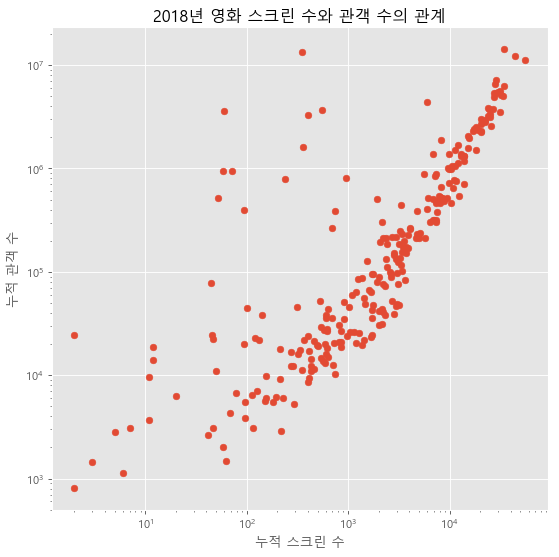

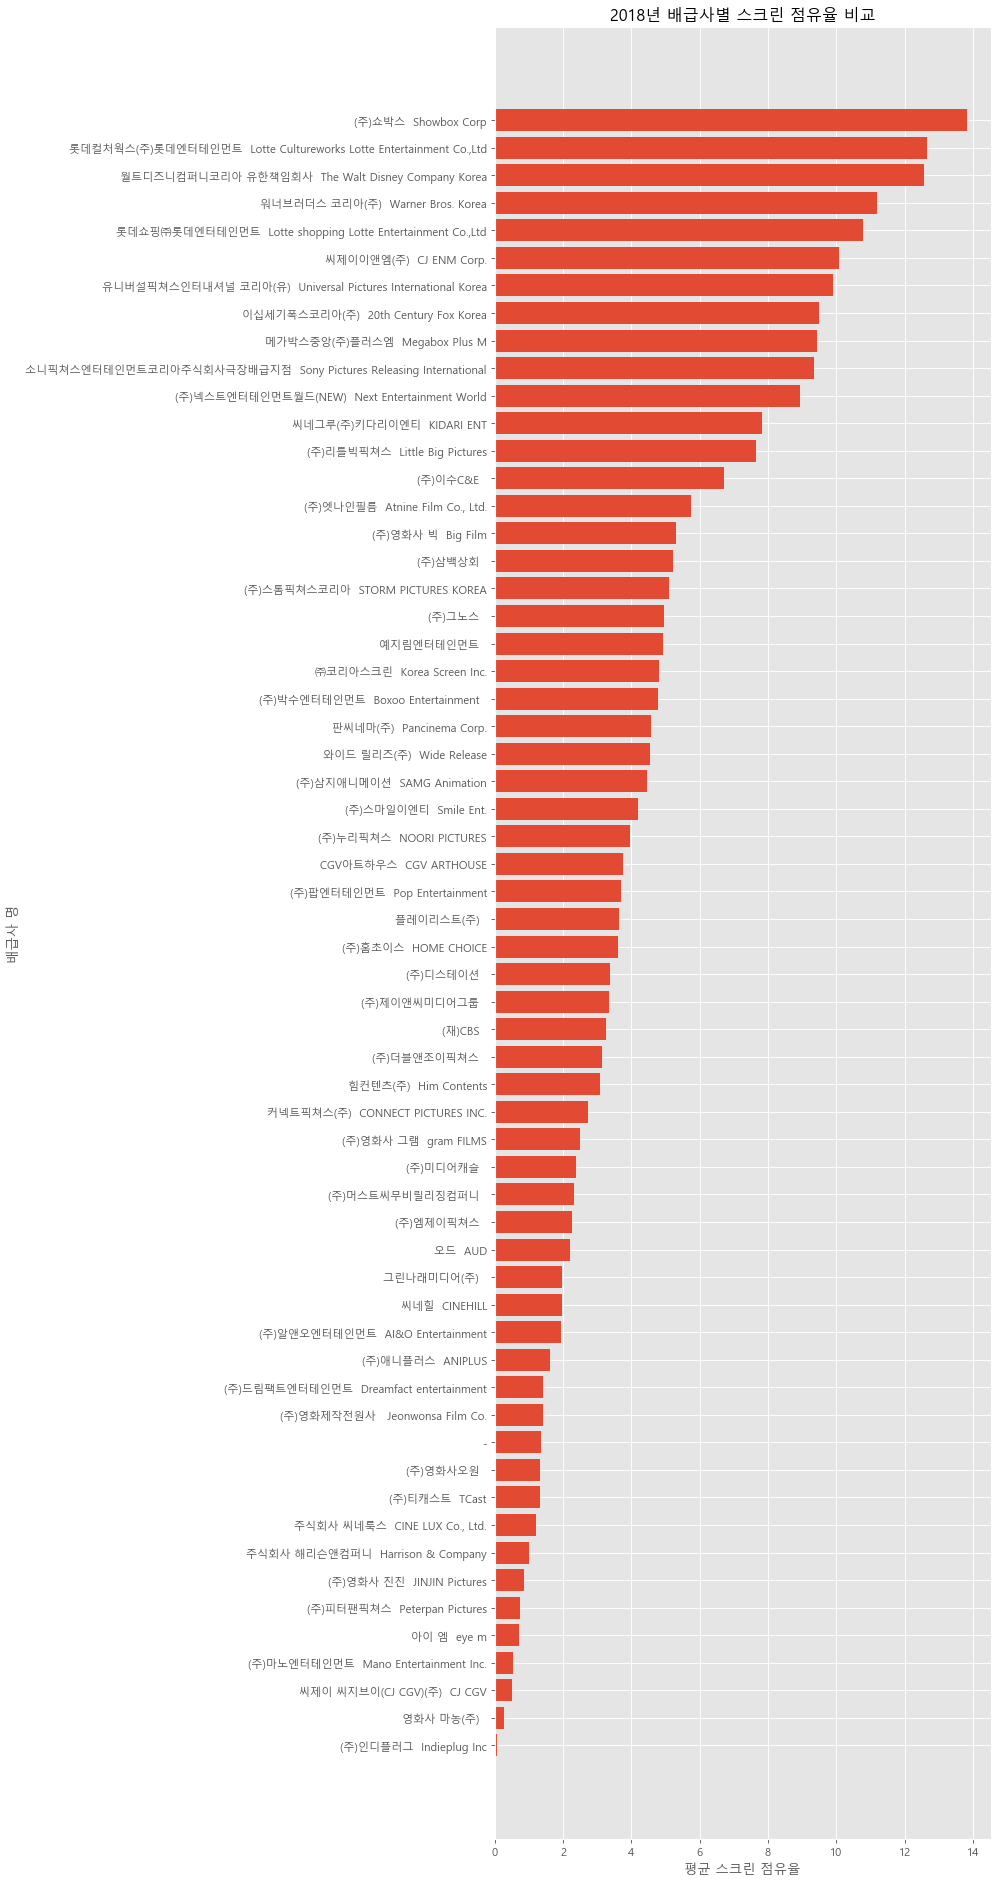

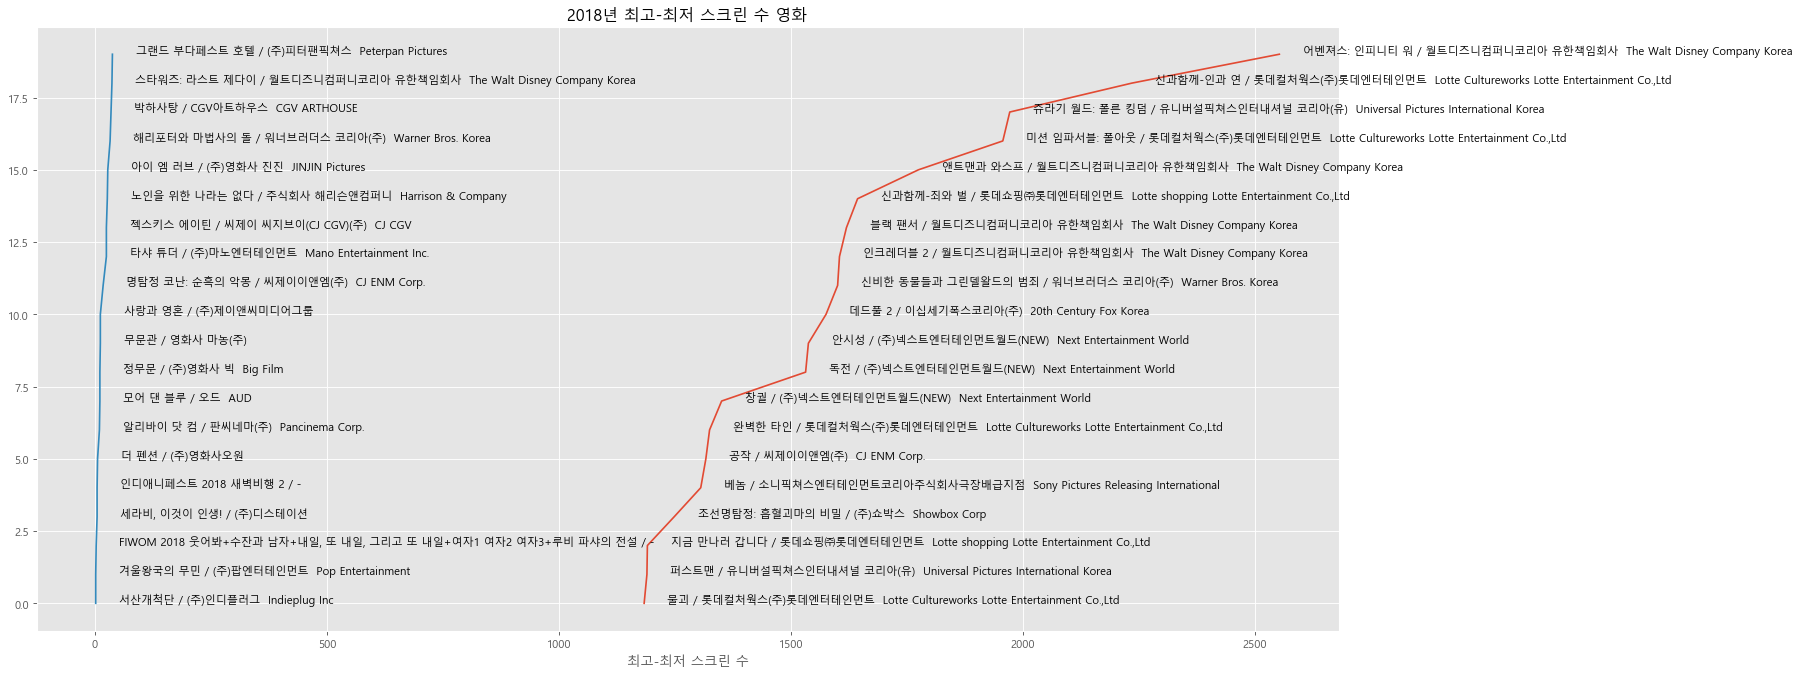

In [2]:
#4의 가공한 데이터 파일 읽어오기
import pandas as pd
movielist = pd.read_csv('movielist.csv', encoding='utf-8')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
import numpy as np

# 차트에 한글출력
import platform
from matplotlib import font_manager, rc
path = 'C:/Windows/Fonts/malgun.ttf'
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Error!')
    
    
# 차트 1 
# 스크린 수와 관객 수의 관계 - 스크린 수는 관객 수와 비례하는가?
# x축 누적 스크린 수, y축 누적 관객 수 - 영화마다 점찍기

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

df1 = movielist.loc[:,["TotalScreenNum", "TotalAudienceNum"]]

plt.scatter(df1.TotalScreenNum, df1.TotalAudienceNum)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('누적 스크린 수')
plt.ylabel('누적 관객 수')
plt.title('2018년 영화 스크린 수와 관객 수의 관계')


plt.show()


# 2
# 배급사별 스크린 점유율 비교 - 대기업 영화의 스크린 점유율이 높은가?
# 배급사별 평균 스크린 점유율
# bar chart (Histogram)

plt.figure(num=None, figsize=(8, 30), dpi=80, facecolor='w', edgecolor='k')

df2 = movielist.loc[:,["CompanyName", "AverageShare"]]

# 배급사 리스트 company, 해당 배급사에서 배급한 영화의 평균 스크린 점유율 이중리스트 share
# share : 각 배급사가 배급한 영화들의 평균 스크린 점유율 값 추출 - 리스트에 저장
company = []
share = []
for i in range(256):
    cnm = df2.iloc[i, 0]
    bsh = df2.iloc[i, 1]*100
    
    if cnm in company:
        share[company.index(cnm)].append(bsh)
    else:
        company.append(cnm)
        share.append([bsh])

# 배급사별 평균 스크린 점유율 구하기
# share 리스트의 내용 : 스크린 점유율 리스트 -> 스크린 점유율의 평균
for i in range(len(share)):
    sum = 0
    for j in share[i]:
        sum += j
    share[i] = round(sum/len(share[i]),4)

#정렬
data = {'Company':company, 'Share':share}
df2 = pd.DataFrame(data, columns=['Company', 'Share'])
df2.sort_values(by='Share', inplace=True)

# bar chart 그리기
X_axis = df2.Share
Y_axis = df2.Company

ys = [i for i, _ in enumerate(Y_axis)]
plt.yticks([i for i, _ in enumerate(Y_axis)], Y_axis)
plt.barh(ys,X_axis)

plt.title("2018년 배급사별 스크린 점유율 비교")
plt.xlabel('평균 스크린 점유율')
plt.ylabel('배급사 명')

plt.show()


# 3
# 최고 스크린 수를 기준으로 정렬하여 최고, 최저인 영화 각 20개 비교 - 어느 제작사인가
# 스크린 수가 높은 20가지와 낮은 20가지

plt.figure(num=None, figsize=(21, 10), dpi=80, facecolor='w', edgecolor='k')

df3 = movielist.loc[:,["CompanyName", "MovieName", "BestScreenNum"]]

#정렬
df3.sort_values(by='BestScreenNum', inplace=True)

# chart 그리기
X_axis1 = df3.BestScreenNum[-20:] #최고 20개
X_axis2 = df3.BestScreenNum[:20] #최저 20개
Y_axis = np.arange(20) #20가지 영화

comnm1 = df3.CompanyName[-20:]
movnm1 = df3.MovieName[-20:]
comnm2 = df3.CompanyName[:20]
movnm2 = df3.MovieName[:20]

plt.plot(X_axis1,Y_axis)
plt.plot(X_axis2,Y_axis)

# 영화명 / 제작사명 출력
for a,b,c,d in zip(X_axis1,Y_axis, movnm1, comnm1): 
    plt.text(a+50, b, str(c+' / '+d))
for a,b,c,d in zip(X_axis2,Y_axis, movnm2, comnm2): 
    plt.text(a+50, b, str(c+' / '+d))
    
plt.xlabel('최고-최저 스크린 수')
plt.title("2018년 최고-최저 스크린 수 영화")

plt.show()

 첫 번째 차트는 ``영화 스크린 수와 관객 수의 관계``를 나타낸 것이다. 차트의 x축은 누적 스크린 수, y축은 누적 관객 수로 설정하고 2018년 상영된 영화들이 해당하는 지점에 점을 찍어 표시했다. 대체로 스크린 수가 많이 배정된 영화일수록 많은 관객을 확보한 것을 확인할 수 있다. 이를 통해 스크린 수는 실제로 관객 수에 영향을 주는 요소이며, 대기업의 수직계열화를 통해 대기업이 상영, 배급한 영화의 스크린 수가 비교적 높은 것이 확인된다면 문화 콘텐츠의 획일화, 거대자본의 영화산업 독점을 우려하는 것이 충분히 가능함을 뒷받침한다. <br><br>
 두 번째 차트는 ``배급사별 스크린 점유율``을 나타낸 것이다. 2018년 상영된 영화들을 배급사별로 나누고, 해당 영화들의 평균 스크린 점유율을 계산해 배급사별 평균 스크린 점유율 값을 도출했다. 결과를 보면 쇼박스, 롯데엔터테인먼트, CJ E&M, 넥스트엔터테인먼트월드(new)의 국내 4대 대형 배급사와 멀티플렉스 영화관 체인 메가박스의 산하 배급 브랜드 메가박스 중앙(주) 플러스 엠이 높은 스크린 점유율을 보였다. 국내 배급사 외에도 월트디즈니컴퍼니, 워너브러더스, 유니버설 픽쳐스, 이십 세기 폭스, 소니 픽쳐스의 할리우드 6대 대형 배급사도 높은 점유율을 보였다. 미국 배급사의 영화가 높은 스크린 점유율을 보인 것을 통해 대기업 상영관에서 자사 영화에게만 스크린을 몰아주는 것은 아님을 유추할 수 있다. 하지만 멀티플렉스 CGV를 운영하는 그룹 CJ 산하의 투자배급사 CJ E&M, 멀티플렉스 롯데시네마를 운영하는 그룹 롯데 산하의 투자배급사 롯데엔터테인먼트, 멀티플렉스 메가박스를 운영하는 중앙그룹 산하의 배급사 플러스 엠의 스크린 점유율 역시 높은 순위를 차지한 것으로 보아 다수의 대기업 산하 상영관에서 대기업이 투자 배급한 영화에 높은 수의 스크린을 배정했음으로 해석할 수 있다. <br><br>
 세 번째 차트는 ``최고-최저 스크린 수 영화``를 분석한 것이다. 영화의 최고 스크린 수를 기준으로 정렬하여 양극단의 스크린 수 보유 영화 각 20편의 목록을 나타낸 것이다. 2018년에는 미국 대형 배급사인 월트디즈니컴퍼니의 "어벤져스: 인피니티 워"가 2553개로 일일 가장 높은 스크린 수를 가졌다. 이 외에도 롯데엔터테인먼트, 유니버설 픽쳐스, 월트디즈니컴퍼니, 워너브러더스, 이십 세기 폭스, 넥스트엔터테인먼트월드, CJ E&M,소니 픽쳐스, 쇼박스 등 위의 차트에서 언급되었던 배급사들의 영화가 1000개 이상 높은 수의 스크린을 배정받았다. 반대로 가장 적은 수의 스크린을 배정받은 영화는 중소규모 배급사 (주)인디플러그의 영화 서산개척단으로, 일일 최고 2개의 스크린 수를 배정받은 것으로 나타났다. 이외에도 팝 엔터테인먼트, 디스테이션, 영화사 오원, 판씨네마, 빅, 마농, 제이앤씨 미디어 그룹, 진진 등 중소규모 배급사의 영화가 다수 하위를 차지했다. 하지만 그랜드 부다페스트 호텔, 스타워즈, 박하사탕, 해리포터 등 재상영 영화는 메이저 배급사가 배급했음에도 낮은 스크린 수를 보였다.<br><br>

## 6. 결론

 애초 설정한 가설 '대기업의 배급과 상영 겸업, 스크린 독과점에 영향을 줄 것이다.'를 증명하기 위해, 2018년 한 해 동안(2018-01-01 ~ 2018-12-04) 상영된 영화들의 정보를 이용하여 데이터 분석을 진행하였다. 분석 과정을 요약하자면 영화의 이름, 코드, 배급사 정보, 일일 스크린 수, 누적 관객 수 정보를 추출 및 가공하여 저장하고, 저장된 정보를 분석하여 세 가지 차트로 결과를 표현했다. 도출된 차트를 통해 분석 결과를 확인하고, 명제의 사실 여부를 판단하는 근거로 삼을 수 있다. <br><br>

 분석 결과는 크게 두 가지로 정리할 수 있다. <br>1. 스크린 수는 관객 수와 비례하는 영화 흥행의 한 요소이다. <br>2. 주요 메이저 배급사가 배급한 영화가 높은 스크린 점유율을 보였다. 특히 국내 영화의 경우 높은 스크린 수를 보인 영화는 모두 수직계열화한 대기업에서 배급 및 상영한 영화이다. <br>
이러한 결과를 통해 대기업의 배급 및 상영 겸엽(수직계열화)는 실제로 스크린 독점 현상에 영향을 주고, 이는 영화의 흥행으로 이어진다는 결론을 도출할 수 있다. 대기업의 수직계열화가 스크린 독과점에 영향을 줄 것이라는 가설이 적절했음을 유추할 수 있다.<br><br>
 
 다만, 누적 관객 수는 오픈 API에서 제공받아 사용했으나 누적 스크린 수는 임의로 일일 스크린 수의 합산을 통해 도출한 결과를 사용하여 스크린 수 대비 관객 수가 높게 분석될 수 있다는 점, 상영관별 스크린 수 등 세세한 상영 정보는 얻을 수 없어서 각 멀티플렉스가 자사에서 투자 배급한 영화에 스크린을 더 배정했는지의 사항은 확인하지 못했다는 점, 분석 기간을 2018년 1월 1일 ~ 현재(12/5 기준)까지로 설정하여 작년에 개봉 후 올해 초 상영 끝 무렵인 영화 혹은 최근에 개봉한 영화의 낮은 스크린 수 및 점유율 데이터가 평균 스크린 수에 영향을 주었을 가능성이 있다는 점 등 자료 분석의 한계점이 있음을 밝힌다.<br><br>

## 7. 참고문헌

- [웹크롤링-크롤링(crawling) 이해 및 기본], 잔재미코딩<br>
http://fun-coding.org/crawl_basic2.html<br><br>

- [Python requests 모듈 간단 정리], 개발새발로그<br>
https://dgkim5360.tistory.com/entry/python-requests<br><br>

- [파이썬으로 크롤링 하기], hans mj<br>
https://link.medium.com/7wnRMQGaaS<br><br>

- [파이썬으로 데이터 주무르기], 민형기 지음, 비제이퍼블릭, 2017년 12월 29일 출간<br>
http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode=9791186697474&orderClick=LEA&Kc=<br><br>

- [[ python ] Matplotlib를 활용한 기본 그래프 그리기], peter_yun<br>
https://medium.com/@peteryun/python-matplotlib-%EA%B8%B0%EB%B3%B8-6e23e5fd2f16<br><br>

- [pandas DataFrame 조작하기]<br>
http://nittaku.tistory.com/112?category=725162<br><br>

- [matplotlib의 공식 웹 사이트] <br>
https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py

## 8. 별첨 (3의 획득한 데이터 원본)

#### 1) 영화진흥위원회 오픈 API
``movie.txt`` (첨부) - 응답받은 XML data를 text파일로 저장한 것<br>
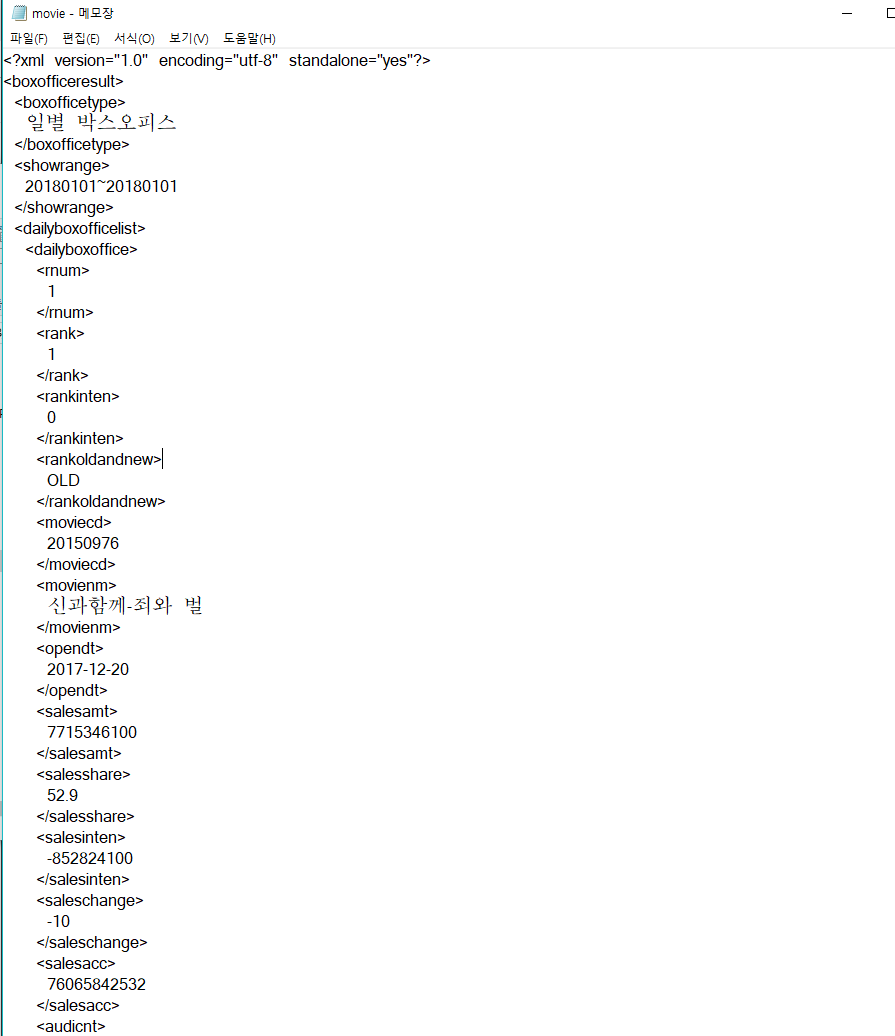
<br><br><br>
#### 2) 영화진흥위원회 웹페이지 크롤링
``movie2.txt`` (첨부) - 예시. 영화 '성난황소'의 영화코드 '20184481'을 통해 받은 data를 text파일로 저장한 것<br>
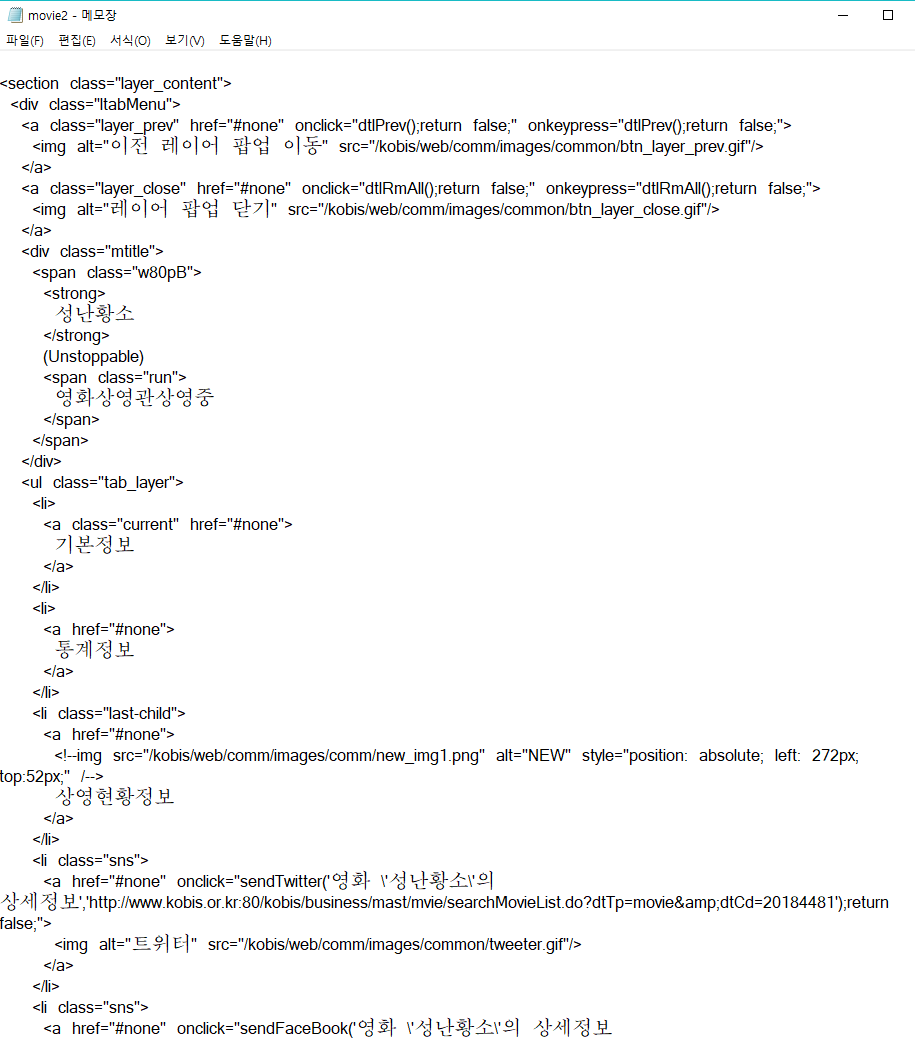

## 9. 별첨 (4의 가공된 데이터 원본)

``movielist.csv`` (첨부)<br>
- 순번, 영화코드, 영화명(국문), 배급사명, 최대 스크린 수, 최대 스크린 점유율, 누적 스크린 수, 누적 관객 수
- 2018년 1월 1일 ~ 2018년 11월 27일 상영된 영화들의 정보
<br><br>
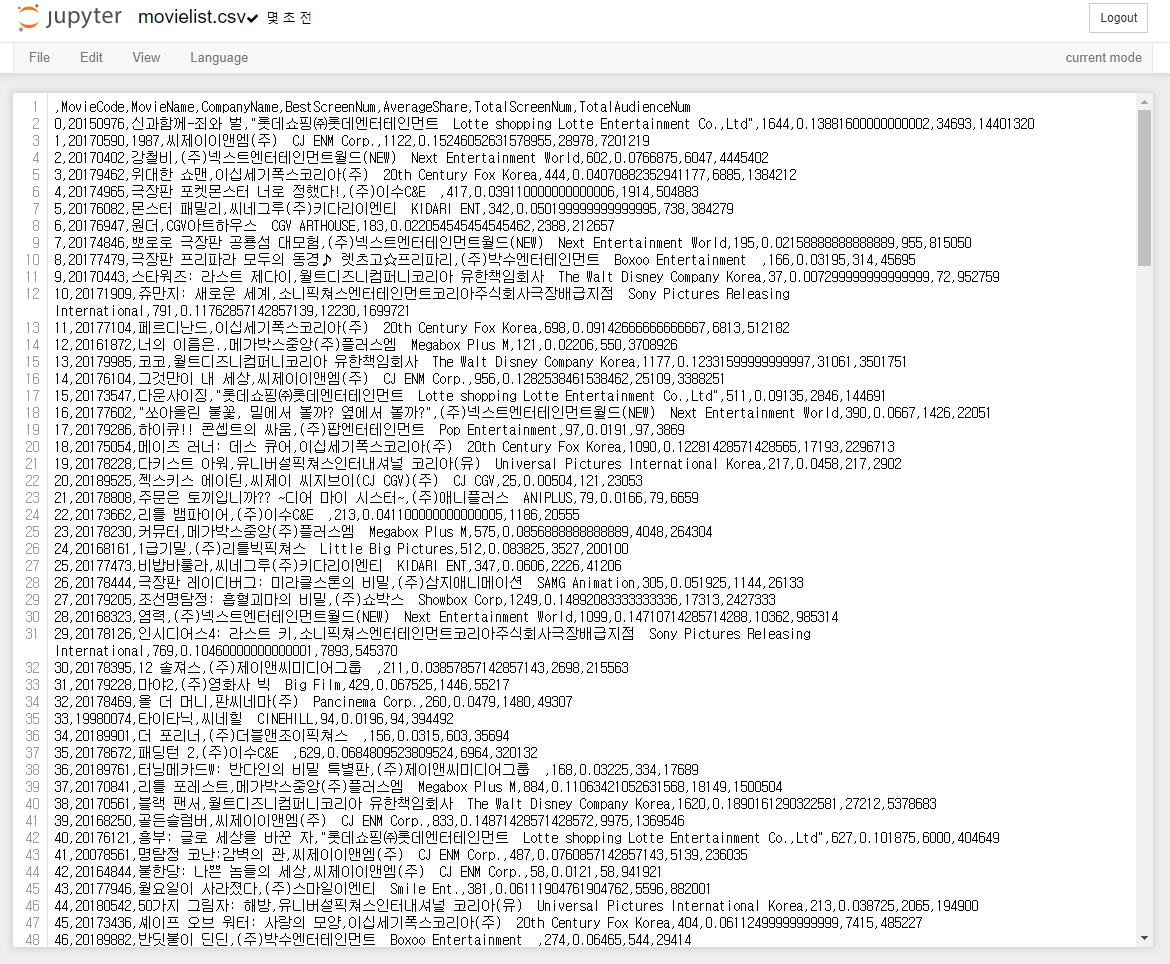
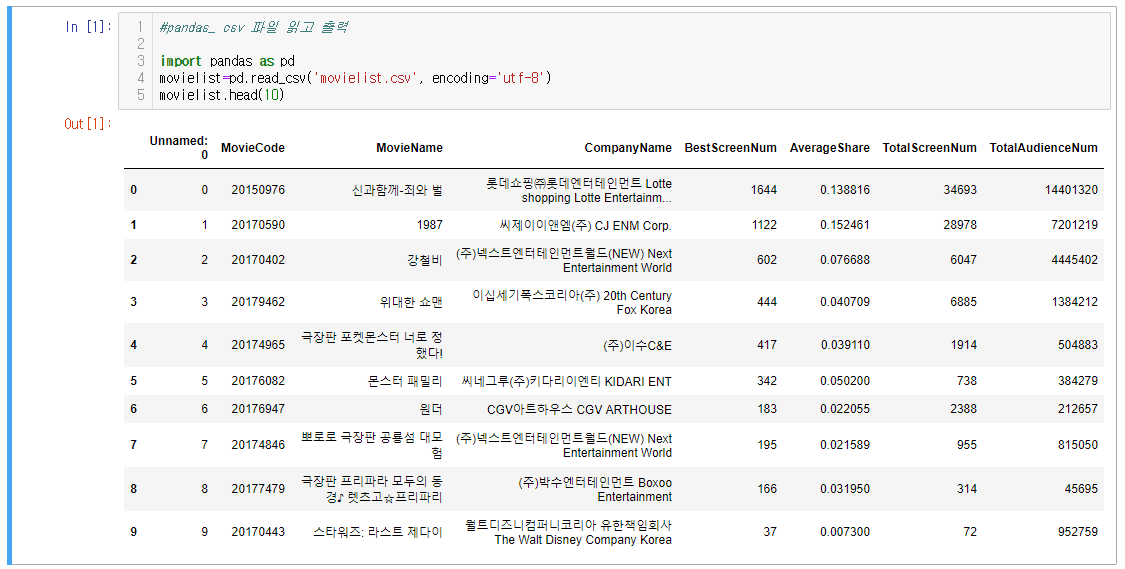

## 10. 별첨 (3을 4로 변환하는 등의 작업을 위한 python 코드)

In [ ]:
##영화 정보 불러오기
import requests
from bs4 import BeautifulSoup
import pandas as pd
df=pd.date_range('2018-01-01', '2018-11-27', freq='D')
dt=df.strftime('%Y%m%d')

#키1 : 2e3f9f878d5e3e4d501f989112f6dbc5
#키2 : 499579db3f549b47911ab6f94de402fd
_key = "2e3f9f878d5e3e4d501f989112f6dbc5"
#조회일자 yyyymmdd형식
_targetDt = ""
#영화코드
_movieCd = ""

moviecd=[]
movienm=[]
companynm=[]
b_screennum=[]
a_sh=[]
a_shnum=[] # 스크린 점유율의 평균을 구하기 위해, 몇 번의 평균인지 저장할 리스트 생성
t_screennum=[]
t_audiencenum=[]

## 2018년 영화 목록 추출 (영화명, 영화코드, 스크린 수 정보)
for i in dt:
    _targetDt = i
    params = {'key' : _key, 'targetDt':_targetDt}
    res=requests.get('http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml', params=params)
    soup = BeautifulSoup(res.content, 'html.parser')
    
    #영화명, 영화코드, 해당일자에 상영한 스크린 수, 누적관객수, 해당일자 총 스크린 수
    title = soup.find_all('movienm')
    code = soup.find_all('moviecd')
    screen = soup.find_all('scrncnt')
    audience = soup.find_all('audiacc')
    screensum = 0
    for i in screen:
        screensum += int(i.string) 
        
    #각각의 정보를 리스트에 저장
    #영화명, 영화코드, 해당 영화 최고 스크린 수, 평균 스크린 점유율, 누적 스크린 수, 누적 관객 수
    for i in range(len(code)):
        _title = title[i].string
        _code = code[i].string
        _screen = screen[i].string
        _screensh = round(int(_screen)/screensum,4)
        _audi = audience[i].string
        
        #처음 저장하는 영화인 경우
        if _code not in moviecd:
            movienm.append(_title)
            moviecd.append(_code)
            b_screennum.append(_screen)
            a_sh.append(_screensh)
            a_shnum.append(1)
            t_screennum.append(_screen)
            t_audiencenum.append(_audi)
        
        #이미 저장된 영화인 경우
        else:
            if int(_screen) > int(b_screennum[moviecd.index(_code)]):
                b_screennum[moviecd.index(_code)] = _screen
            a_sh[moviecd.index(_code)] = ((a_sh[moviecd.index(_code)]*a_shnum[moviecd.index(_code)])+_screensh)/(a_shnum[moviecd.index(_code)]+1)
            a_shnum[moviecd.index(_code)] += 1
            t_screennum[moviecd.index(_code)] = int(t_screennum[moviecd.index(_code)]) + int(_screen)
            t_audiencenum[moviecd.index(_code)] = _audi
    screensum=0
    
## 제작사명 정보 불러오기 - POST 방식, KOFIC 영화진흥위원회 웹페이지 크롤링
url = "http://www.kobis.or.kr/kobis/business/mast/mvie/searchMovieDtl.do"
for cd in moviecd:
    data={'code':cd, 'sType':''}
    res=requests.post(url, data=data)
    soup = BeautifulSoup(res.content, 'html.parser')
        
    isfind=False
    #div태그 - class='moreArea' / li태그 - class='companyDtl1' : "배급사"
    #div태그 - class='moreArea' / li태그 - class='companyDtl2' : 배급사명
    companykind = soup.find("div",{"class":"moreArea"})
    if companykind is not None:
        companykind = companykind.find_all("li", {"class":"companyDtl1"})
        company = soup.find("div",{"class":"moreArea"}).find_all("li", {"class":"companyDtl2"})
      
        for i in range(len(companykind)):
            if(companykind[i].string) == "배급사":
                _company = company[i].find('a').text
                companynm.append(_company)
                isfind=True
                
    #배급사 정보가 없는 경우 예외처리
    if(not isfind):
        companynm.append('-')
    
#추출한 데이터 csv파일로 저장
data = {'MovieCode':moviecd, 'MovieName':movienm, 'CompanyName':companynm, 'BestScreenNum':b_screennum, 'AverageShare':a_sh, 'TotalScreenNum':t_screennum, 'TotalAudienceNum':t_audiencenum}
df = pd.DataFrame(data, columns=['MovieCode', 'MovieName', 'CompanyName', 'BestScreenNum', 'AverageShare', 'TotalScreenNum', 'TotalAudienceNum'])

df.to_csv('movielist.csv', sep=',', encoding='UTF-8')